### Load Library

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from keras.models import load_model
%matplotlib inline
from misc.mc_dnn import DNN
instance = DNN()

# x_train, y_train, x_validation, y_validation 
# train_data, train_label, test_data, test_label

Using TensorFlow backend.


### Load Data - Interpolation

In [2]:
def build_dataset(N, noise_std=0.25, is_test=True):
    x = np.random.rand(N, 1)

    if is_test:
        x = 8 * x - 4
    else:
        x = 6 * x - 3
        x[x < 0] -= 1
        x[x > 0] += 1

    # data with noise
    y = 0.1 * x ** 3 + np.random.normal(0, noise_std, size=(N, 1))

    return x, y

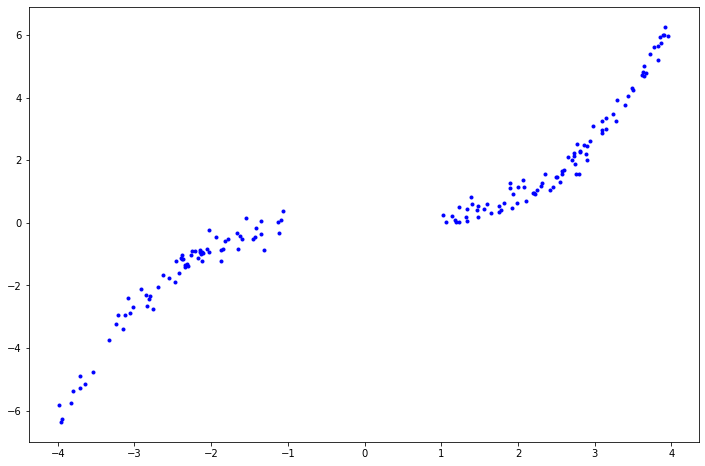

In [3]:
# Raw Data
x_train_val, y_train_val = build_dataset(200, noise_std=0.25, is_test=False)
x_test, y_test = build_dataset(800, noise_std=0.25, is_test=True)

# Split Data
num_training_examples = int(0.8 * np.shape(x_train_val)[0])
x_train = x_train_val[0:num_training_examples, :]
y_train = y_train_val[0:num_training_examples]
x_validation = x_train_val[num_training_examples:, :]
y_validation = y_train_val[num_training_examples:]

# Plot Data 
plt.figure(figsize=(12, 8))
plt.plot(x_train, y_train, 'b.')

### DNN

In [15]:
# dnn_model = instance.build_dnn_model(x_train, y_train)
# dnn_model.save('/Users/mingyu/Desktop/co2/dnn_model_random.h5')

In [16]:
# dnn_model = load_model('/Users/mingyu/Desktop/co2/dnn_model_random.h5')

# plt.rcParams["figure.figsize"] = (10,8)
# dnn_model_train_pred = dnn_model.predict(x_train)
# plt.plot(x_train, y_train, 'g.')
# plt.plot(x_train.reshape(-1), dnn_model_train_pred.reshape(-1))

In [17]:
# dnn_model_all_pred = dnn_model.predict(x_test)

# plt.plot(x_test, y_test, 'g.')
# plt.scatter(x_test.reshape(-1), dnn_model_all_pred.reshape(-1))

### mc_DNN

In [7]:
# mc_dnn_model = instance.build_mc_dnn_model(x_train, y_train)
# mc_dnn_model.save('/Users/mingyu/Desktop/co2/mc_dnn_model_random.h5')

160/160 [==============================] - 0s 1ms/step


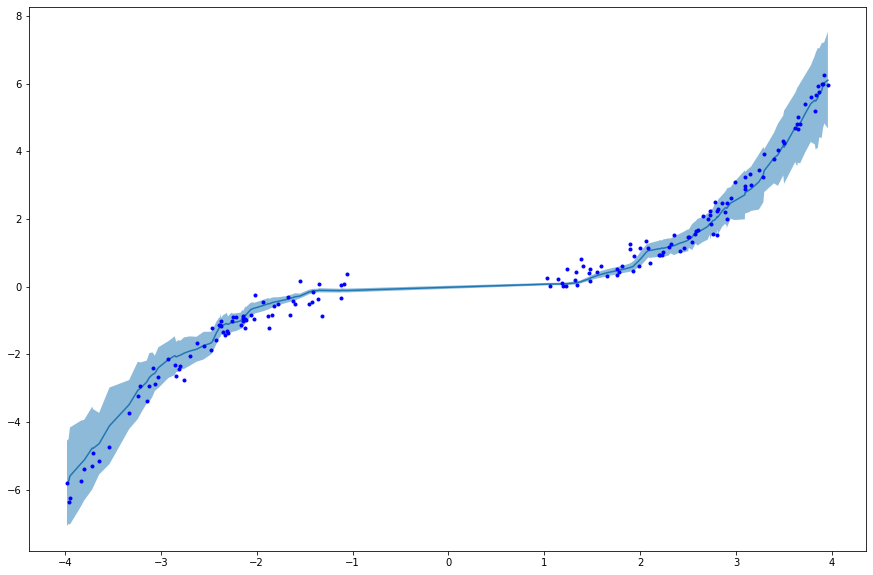

In [22]:
mc_dnn_model = load_model('/Users/mingyu/Desktop/co2/mc_dnn_model_random.h5')
standard_pred, MC_pred, MC_std = instance.predict(x_train, mc_dnn_model)
MC_pred_high = (MC_pred + MC_std).reshape(-1)
MC_pred_low = (MC_pred - MC_std).reshape(-1)
x_train = x_train.reshape(-1)

index = np.argsort(x_train)
x_train = x_train.reshape(-1)[index]
y_train = y_train.reshape(-1)[index]
MC_pred = MC_pred.reshape(-1)[index]
MC_pred_high = MC_pred_high.reshape(-1)[index]
MC_pred_low = MC_pred_low.reshape(-1)[index]

plt.figure(figsize=(15, 10))
plt.plot(x_train, MC_pred)
plt.fill_between(x_train, y1=MC_pred_high, y2=MC_pred_low, alpha=0.5)
plt.plot(x_train, y_train, 'b.')

800/800 [==============================] - 0s 67us/step


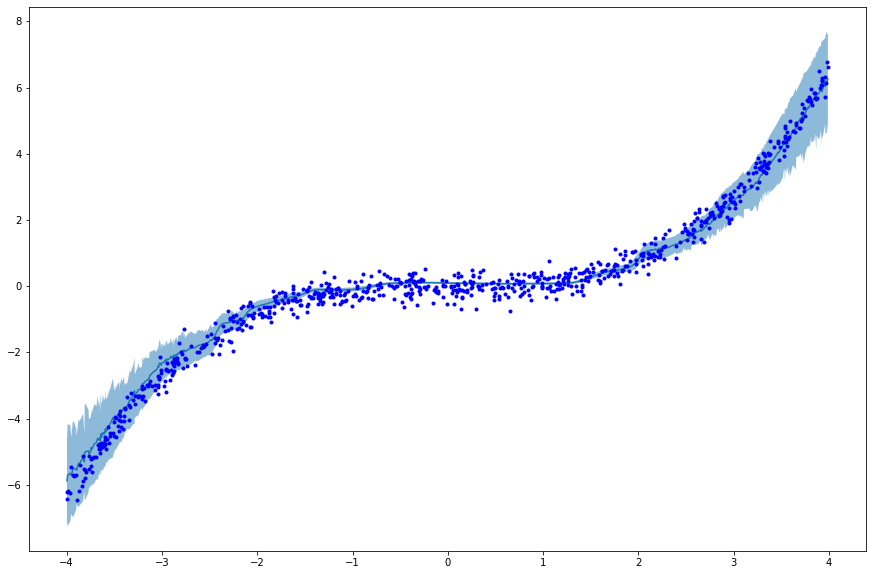

In [21]:
standard_pred, MC_pred, MC_std = instance.predict(x_test, mc_dnn_model)
MC_pred_high = (MC_pred + MC_std).reshape(-1)
MC_pred_low = (MC_pred - MC_std).reshape(-1)
x_test = x_test.reshape(-1)

index = np.argsort(x_test)
x_test = x_test.reshape(-1)[index]
y_test = y_test.reshape(-1)[index]
MC_pred = MC_pred.reshape(-1)[index]
MC_pred_high = MC_pred_high.reshape(-1)[index]
MC_pred_low = MC_pred_low.reshape(-1)[index]

plt.figure(figsize=(15, 10))
plt.plot(x_test, MC_pred)
plt.fill_between(x_test, y1=MC_pred_high, y2=MC_pred_low, alpha=0.5)
plt.plot(x_test, y_test, 'b.')

### Walker mc_DNN

In [18]:
# from misc.mc_dnn import MCDnn
# def run_mc_dnn(dropout_rates, tau_values, num_hidden_layers, n_hidden, n_epochs, batch_size, 
#               x_train, y_train, x_validation, y_validation):
#     best_network = None 
#     best_tau, best_dropout, best_ll = 0, 0, -float('inf')
#     for dropout_rate in dropout_rates:
#         for tau in tau_values:
#             print('\nGrid search step: Tau: ' + str(tau) + ' Dropout rate: ' + str(dropout_rate))
#             MC_dnn = MCDnn(n_hidden = [int(n_hidden)]*num_hidden_layers, n_epochs=n_epochs, batch_size=batch_size, tau=tau, dropout=dropout_rate)
#             MC_dnn.build_model(x_train, y_train)
#             _, _, _, ll = MC_dnn.predict(x_validation, y_validation)

#             if (ll > best_ll):
#                 best_ll = ll
#                 best_network = MC_dnn
#                 best_tau = tau
#                 best_dropout = dropout_rate
#                 print('Best log_likelihood changed to: ' + str(best_ll))
#                 print('Best tau changed to: ' + str(best_tau))
#                 print('Best dropout rate changed to: ' + str(best_dropout))
                
#     return best_network, best_tau, best_dropout

In [19]:
# best_network, best_tau, best_dropout = run_mc_dnn(dropout_rates, tau_values, num_hidden_layers, n_hidden, n_epochs, 
#                                                   batch_size, train_data, train_label, test_data, test_label)